# Import Libraries

In [65]:
# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To do inferential analysis
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, f_oneway

# Test train split for training the model
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

#Importing confusion_matrix, accuracy_score, classification_report from sklearn.metrics library to obtain confusion matrix, accuracy score and classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.pipeline import Pipeline



In [66]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('Bank Customer Churn Prediction.csv')
print("Original Data:")
# print the first 5 rows of the dataframe
df.head()

Original Data:


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
# Drop unnecessary columns
# Assuming unnecessary columns based on common practice, adjust as needed
columns_to_drop = ['customer_id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [75]:
print(f"The missing values given columns are:")
df.isnull().sum()

The missing values given columns are:


credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [76]:
# Display the cleaned data
print("Cleaned Data:")
df.head()

Cleaned Data:


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

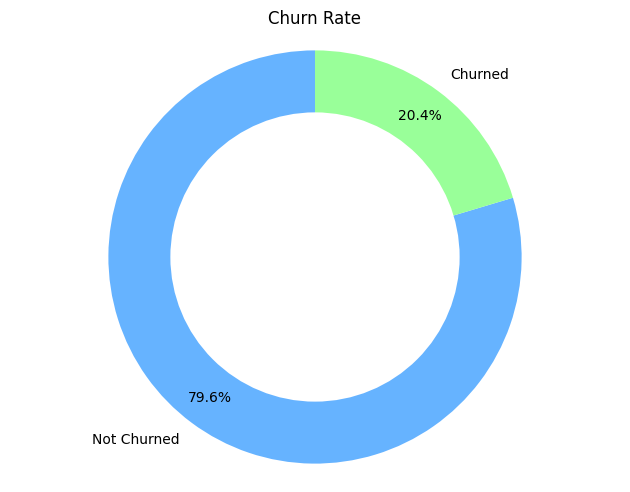

In [77]:
import matplotlib.pyplot as plt

# Calculate churn rate
churn_counts = df['churn'].value_counts()
churn_rate = churn_counts / churn_counts.sum() * 100

# Plotting a donut chart
labels = ['Not Churned', 'Churned']
sizes = churn_rate.values
colors = ['#66b3ff','#99ff99']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.title('Churn Rate')
plt.show()

In [78]:
# types of columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

categorical_cols = df.select_dtypes(include=['object']).columns

In [80]:
# Example: T-test for numerical variables
for col in numerical_cols:
    group1 = df[df['churn'] == 0][col]
    group2 = df[df['churn'] == 1][col]
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"T-test for {col} between Exited and Non-Exited Customers:\nT-statistic: {t_stat}\nP-value: {p_value}\n")

# Example: ANOVA for categorical variables with more than two groups
# Assuming 'Geography' is categorical with more than two levels
for col in ['country']:  # Adjust as per actual categorical variables
    groups = [df[df[col] == group][df['churn'] == 1]['balance'] for group in df[col].unique()]
    f_stat, p_value = f_oneway(*groups)
    print(f"ANOVA for {col} and Exited:\nF-statistic: {f_stat}\nP-value: {p_value}\n")

T-test for credit_score between Exited and Non-Exited Customers:
T-statistic: 2.7100778888729833
P-value: 0.006738213892192373

T-test for age between Exited and Non-Exited Customers:
T-statistic: -29.76681499437077
P-value: 1.2399313093427736e-186

T-test for tenure between Exited and Non-Exited Customers:
T-statistic: 1.4000584366735584
P-value: 0.16152684949473256

T-test for balance between Exited and Non-Exited Customers:
T-statistic: -11.936240300013841
P-value: 1.2755633191525477e-32

T-test for products_number between Exited and Non-Exited Customers:
T-statistic: 4.786984698423093
P-value: 1.717333004804293e-06

T-test for credit_card between Exited and Non-Exited Customers:
T-statistic: 0.7137233605912605
P-value: 0.47541491837605643

T-test for active_member between Exited and Non-Exited Customers:
T-statistic: 15.80508761104082
P-value: 1.3482685164857624e-55

T-test for estimated_salary between Exited and Non-Exited Customers:
T-statistic: -1.209653638019264
P-value: 0.2264

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3302321746.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [df[df[col] == group][df['churn'] == 1]['balance'] for group in df[col].unique()]
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3302321746.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [df[df[col] == group][df['churn'] == 1]['balance'] for group in df[col].unique()]
C:\Users\HP\AppData\Local\Temp\ipykernel_12648\3302321746.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  groups = [df[df[col] == group][df['churn'] == 1]['balance'] for grou

In [81]:
# Example: Pearson correlation coefficient for numerical variables
for col in numerical_cols:
    corr, p_value = pearsonr(df[col], df['churn'])
    print(f"Pearson correlation coefficient between {col} and Exited: {corr}\nP-value: {p_value}\n")

Pearson correlation coefficient between credit_score and Exited: -0.027093539754657777
P-value: 0.006738213892192682

Pearson correlation coefficient between age and Exited: 0.285323037835068
P-value: 1.239931309342581e-186

Pearson correlation coefficient between tenure and Exited: -0.014000612253444608
P-value: 0.16152684949472973

Pearson correlation coefficient between balance and Exited: 0.11853276877163377
P-value: 1.2755633191525245e-32

Pearson correlation coefficient between products_number and Exited: -0.04781986494944051
P-value: 1.7173330048042905e-06

Pearson correlation coefficient between credit_card and Exited: -0.007137765603039002
P-value: 0.4754149183760681

Pearson correlation coefficient between active_member and Exited: -0.1561282781889051
P-value: 1.3482685164858249e-55

Pearson correlation coefficient between estimated_salary and Exited: 0.012096861026844659
P-value: 0.226440428022237

Pearson correlation coefficient between churn and Exited: 0.9999999999999999


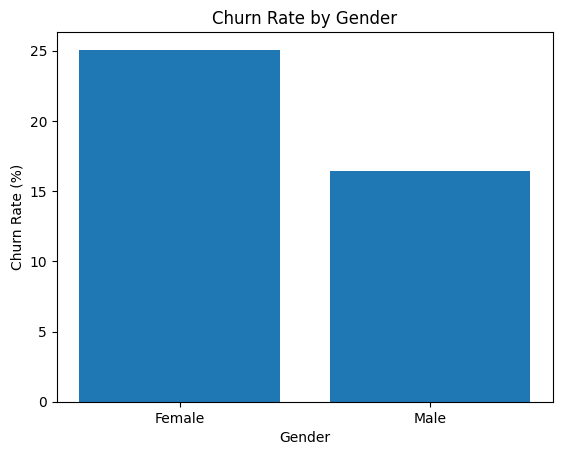

In [82]:
# Group the data by gender and calculate churn rate for each group
gender_churn = df.groupby('gender')['churn'].mean()

# Create a bar chart
plt.bar(gender_churn.index, gender_churn.values * 100)
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Gender')
plt.show()

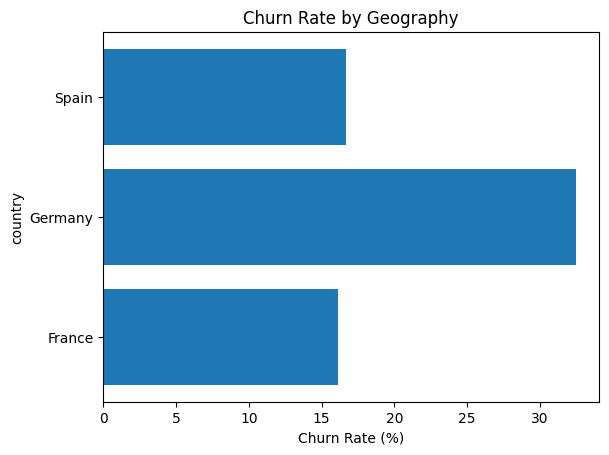

In [83]:
# Group the data by geography and calculate churn rate for each group
geography_churn = df.groupby('country')['churn'].mean()

# Create a horizontal bar chart
plt.barh(geography_churn.index, geography_churn.values * 100)
plt.xlabel('Churn Rate (%)')
plt.ylabel('country')
plt.title('Churn Rate by Geography')
plt.show()

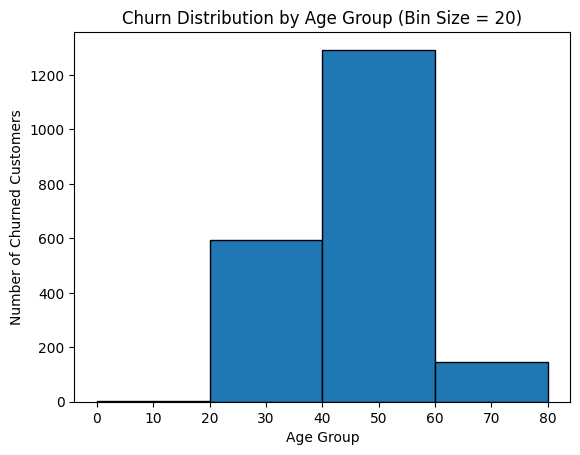

In [84]:
# Create a histogram to show churn % for people of different Age group with a bin size =20
plt.hist(df[df['churn'] == 1]['age'], bins=range(0, 100, 20), edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Churned Customers')
plt.title('Churn Distribution by Age Group (Bin Size = 20)')
plt.show()

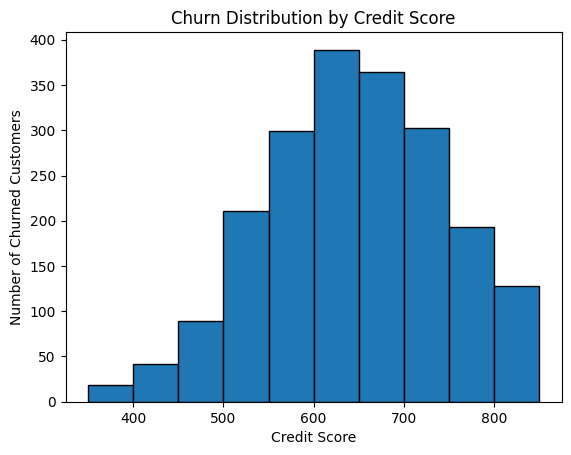

In [86]:
# Create a histogram to show churn % for customers of different CreditScore
plt.hist(df[df['churn'] == 1]['credit_score'], bins=10, edgecolor='black')
plt.xlabel('Credit Score')
plt.ylabel('Number of Churned Customers')
plt.title('Churn Distribution by Credit Score')
plt.show()

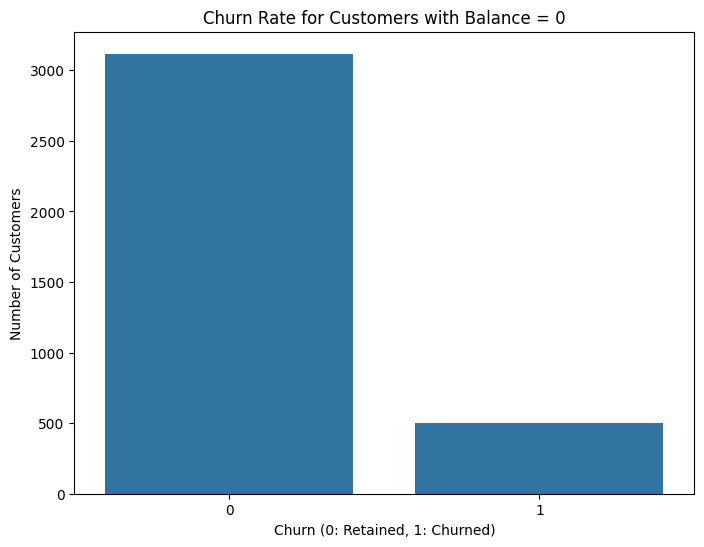

In [87]:
# Filter the DataFrame for customers with Balance = 0
zero_balance_df = df[df['balance'] == 0]

# Create a count plot to show churn rate for customers with Balance = 0
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=zero_balance_df)
plt.xlabel('Churn (0: Retained, 1: Churned)')
plt.ylabel('Number of Customers')
plt.title('Churn Rate for Customers with Balance = 0')
plt.show()

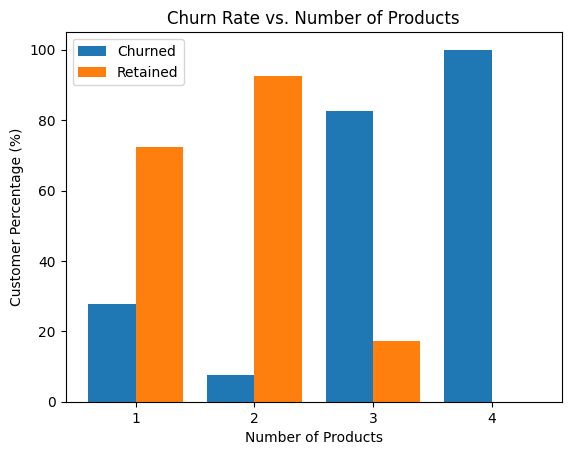

In [88]:
# Group the data by number of products and calculate churn rate for each group
product_churn = df.groupby('products_number')['churn'].mean()

# Create a bar chart
plt.bar(product_churn.index - 0.2, product_churn.values * 100, width=0.4, label='Churned')
plt.bar(product_churn.index + 0.2, (1 - product_churn.values) * 100, width=0.4, label='Retained')
plt.xlabel('Number of Products')
plt.ylabel('Customer Percentage (%)')
plt.title('Churn Rate vs. Number of Products')
plt.xticks(product_churn.index)
plt.legend()
plt.show()

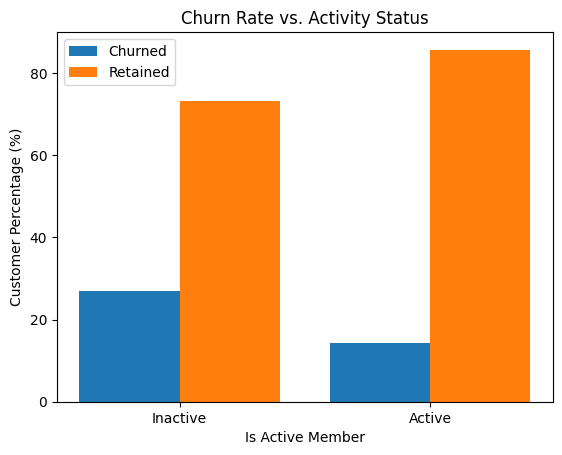

In [89]:
# Group the data by activity status and calculate churn rate for each group
active_churn = df.groupby('active_member')['churn'].mean()

# Create a bar chart
plt.bar(active_churn.index - 0.2, active_churn.values * 100, width=0.4, label='Churned')
plt.bar(active_churn.index + 0.2, (1 - active_churn.values) * 100, width=0.4, label='Retained')
plt.xlabel('Is Active Member')
plt.ylabel('Customer Percentage (%)')
plt.title('Churn Rate vs. Activity Status')
plt.xticks([0, 1], ['Inactive', 'Active'])
plt.legend()
plt.show()

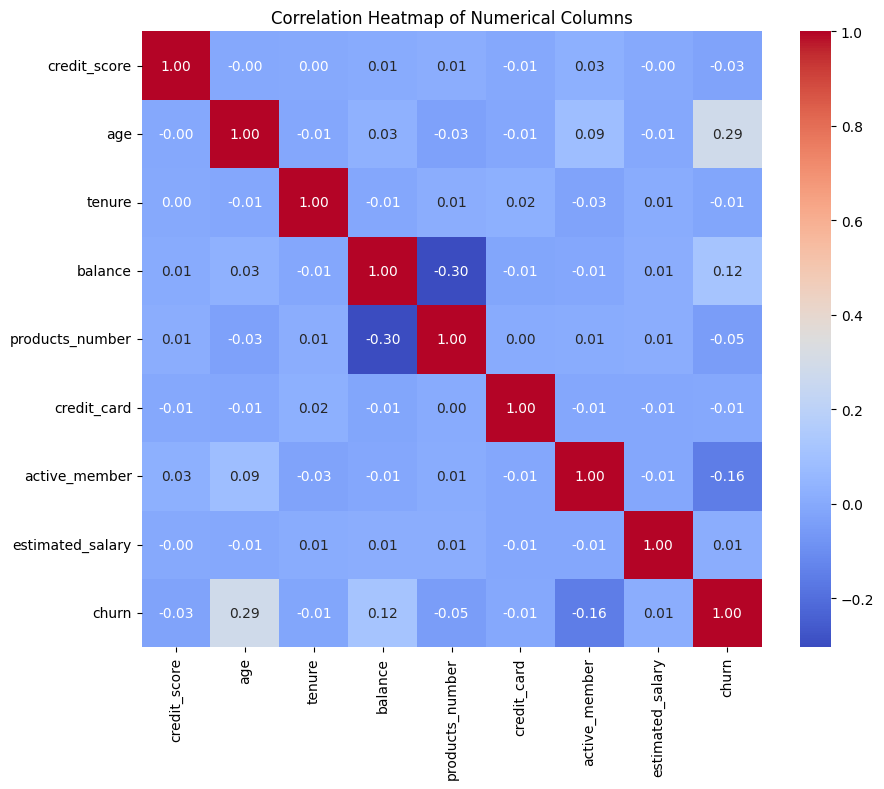

In [90]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Machine Learning

In [91]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df = pd.get_dummies(df, columns=['country', 'gender'])

# Convert any remaining True/False to 1/0 (if they exist)
df = df.astype(int)

# Display the modified DataFrame
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0


In [94]:
# split the data into X and y
X = df.drop('churn', axis=1)
y = df['churn']

In [95]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=36)

In [96]:
scaler=StandardScaler()#To make mean =0 and sd =1 using z score formula
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [97]:
# Specifiy the model
model= LogisticRegression() #Choose c as large
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the Logistic Regression Model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Logistic Regression Model in % is: 80.33
********************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2612
           1       0.58      0.20      0.29       688

    accuracy                           0.80      3300
   macro avg       0.70      0.58      0.59      3300
weighted avg       0.77      0.80      0.76      3300



In [98]:
# Specifiy the model
model= GaussianNB()


# Fit the model to the data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#To check accuracy
print("Accuracy of the Naive Bayes Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Naive Bayes Classifier model in % is: 80.82
********************************************************************************
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      2612
           1       0.57      0.34      0.43       688

    accuracy                           0.81      3300
   macro avg       0.70      0.64      0.66      3300
weighted avg       0.79      0.81      0.79      3300



In [99]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)

#To check accuracy
print("Accuracy of the Decision Tree Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Decision Tree Classifier model in % is: 79.42
********************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2612
           1       0.51      0.50      0.50       688

    accuracy                           0.79      3300
   macro avg       0.69      0.69      0.69      3300
weighted avg       0.79      0.79      0.79      3300



In [100]:
model = RandomForestClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the Random Forest Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the Random Forest Classifier model in % is: 85.09
********************************************************************************
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2612
           1       0.75      0.43      0.54       688

    accuracy                           0.85      3300
   macro avg       0.81      0.69      0.73      3300
weighted avg       0.84      0.85      0.83      3300



In [101]:
model = AdaBoostClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the AdaBoost Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of the AdaBoost Classifier model in % is: 84.24
********************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2612
           1       0.69      0.44      0.54       688

    accuracy                           0.84      3300
   macro avg       0.78      0.69      0.72      3300
weighted avg       0.83      0.84      0.83      3300



In [102]:
model = XGBClassifier()
model.fit(X_train,y_train) #Training
y_pred = model.predict(X_test)
#model.score(X_test,y_test)

#To check accuracy
print("Accuracy of the XGBoost Classifier model in % is:", round(accuracy_score(y_test, y_pred)*100,2))
print("*"*80)

#To print the Classification Report :
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy of the XGBoost Classifier model in % is: 84.09
********************************************************************************
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2612
           1       0.67      0.46      0.55       688

    accuracy                           0.84      3300
   macro avg       0.77      0.70      0.73      3300
weighted avg       0.83      0.84      0.83      3300



In [104]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

In [105]:
# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 0.8653731343283582
Test Accuracy: 0.8515151515151516

Model: Gradient Boosting
Cross-validation Accuracy: 0.8676119402985074
Test Accuracy: 0.8557575757575757

Model: Support Vector Machine
Cross-validation Accuracy: 0.8602985074626865
Test Accuracy: 0.8454545454545455

Model: Logistic Regression
Cross-validation Accuracy: 0.8135820895522388
Test Accuracy: 0.8033333333333333

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.8328358208955224
Test Accuracy: 0.8215151515151515

Model: Decision Tree
Cross-validation Accuracy: 0.8013432835820895
Test Accuracy: 0.7896969696969697



C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated a

Model: Ada Boost
Cross-validation Accuracy: 0.8600000000000001
Test Accuracy: 0.8424242424242424

Model: XG Boost
Cross-validation Accuracy: 0.858358208955224
Test Accuracy: 0.8409090909090909

Model: Naive Bayes
Cross-validation Accuracy: 0.8183582089552239
Test Accuracy: 0.8081818181818182

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])


In [106]:
# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('bank_churn.pkl', 'wb'))

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(random_state=42))])
